In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
def distance(matrix, i, j):
    return matrix[i][j] if matrix[i][j] != 0 else None

def neighbours(matrix, i):
    return [j for j in range(len(matrix)) if distance(matrix, i, j) is not None]

def dijkstra(matrix):
    distance_vector = [float("inf")] * len(matrix)
    distance_vector[0] = 0 
    visited = set()
    heap = [(0, 0)] 
    previous = [None] * len(matrix)

    while heap:
        current_dist, u = heapq.heappop(heap)

        if u in visited:
            continue
        visited.add(u)

        print(f"\nVisiting vertex {u}, current distance: {current_dist}")
        
        for v in neighbours(matrix, u):
            if v in visited:
                continue
            alt = current_dist + distance(matrix, u, v)
            if alt < distance_vector[v]:
                distance_vector[v] = alt
                previous[v] = u
                heapq.heappush(heap, (alt, v))
                print(f" --> Updated distance to vertex {v}: {alt}")
    
    print("\nShortest paths from node 0:")
    for target_node in range(len(matrix)):
        if distance_vector[target_node] == float('inf'):
            print(f"Node {target_node} is unreachable from node 0")
            continue

        path = []
        current = target_node
        while current is not None:
            path.append(current)
            current = previous[current]
        path.reverse()
        print(f"To node {target_node}: path = {path}, distance = {distance_vector[target_node]}")
    
    print("\nFinal shortest distances from source vertex 0:")
    print(distance_vector)

    return distance_vector

def random_graph(n, thresh, max_weight):
    matrix = [[0 if i == j or random.random() > thresh else random.randint(1, max_weight) for j in range(n)] for i in range(n)]
    matrix[0][random.randint(1, n-1)] = random.randint(1, max_weight) # first node has at least one connection
    edges = [(i, j, matrix[i][j]) for i in range(n) for j in range(n) if matrix[i][j] != 0]
    
    print("Adjacency Matrix:")
    for row in matrix:
        print(row)
    
    print("\nEdges with weights:")
    print(edges)
    return matrix

def print_graph(matrix):
    G = nx.MultiDiGraph()
    edges = [(i, j, matrix[i][j]) for i in range(len(matrix)) for j in range(len(matrix)) if matrix[i][j] != 0]
    G.add_weighted_edges_from(edges)
    labels = nx.get_edge_attributes(G, "weight")
    pos = nx.shell_layout(G)
    nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.2', node_size = 1000, node_color = 'red')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, connectionstyle='arc3, rad = 0.2')
    plt.show()

Adjacency Matrix:
[0, 0, 0, 10, 0, 0, 12, 6]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 10, 0]
[0, 0, 14, 0, 0, 0, 0, 3]
[0, 7, 0, 0, 6, 0, 0, 0]

Edges with weights:
[(0, 3, 10), (0, 6, 12), (0, 7, 6), (5, 6, 10), (6, 2, 14), (6, 7, 3), (7, 1, 7), (7, 4, 6)]


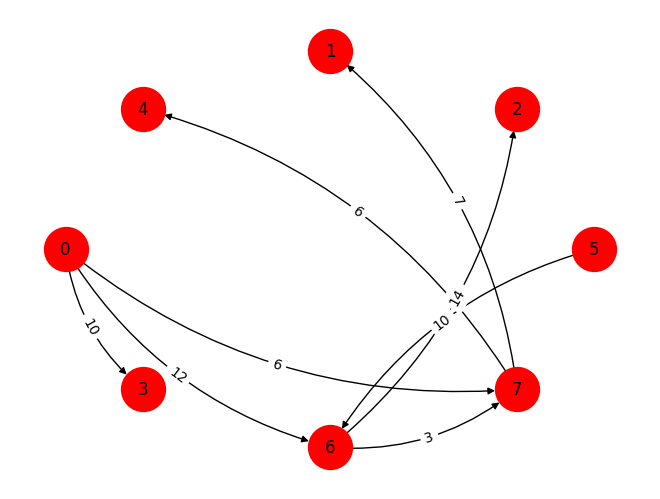

In [5]:
matrix = random_graph(8, .15, 15)
print_graph(matrix)


In [6]:
distance_vector = dijkstra(matrix)


Visiting vertex 0, current distance: 0
 --> Updated distance to vertex 3: 10
 --> Updated distance to vertex 6: 12
 --> Updated distance to vertex 7: 6

Visiting vertex 7, current distance: 6
 --> Updated distance to vertex 1: 13
 --> Updated distance to vertex 4: 12

Visiting vertex 3, current distance: 10

Visiting vertex 4, current distance: 12

Visiting vertex 6, current distance: 12
 --> Updated distance to vertex 2: 26

Visiting vertex 1, current distance: 13

Visiting vertex 2, current distance: 26

Shortest paths from node 0:
To node 0: path = [0], distance = 0
To node 1: path = [0, 7, 1], distance = 13
To node 2: path = [0, 6, 2], distance = 26
To node 3: path = [0, 3], distance = 10
To node 4: path = [0, 7, 4], distance = 12
Node 5 is unreachable from node 0
To node 6: path = [0, 6], distance = 12
To node 7: path = [0, 7], distance = 6

Final shortest distances from source vertex 0:
[0, 13, 26, 10, 12, inf, 12, 6]


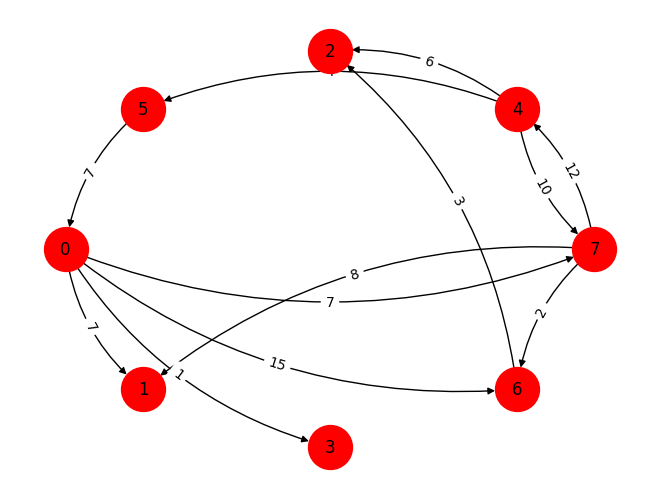

In [ ]:
# specific case

'''
In computer networks, an important task is resource allocation. 
Using the dijkstra algorithm it is possible to process with minimal computational power to which nodes or tasks to add resources, 
based on the weight of the importance they have at the moment.

Take into account that the calculations would be done several times each instant, as the computer pauses processes to reasses the
current situation. The specific example would be the calculation done for a single resource allocation

Imagining a LAN network that has several file servers, and these are each connected, having different characteristics such as 
distance, traffic, status, etc. The problem is to find the least amount of "jumps" a file needs to do between the servers and the computer,
which could be applied to both the request and the answer.
'''

matrix_set = [[0, 7, 0, 1, 0, 0, 15, 7],
[0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 6, 0, 0, 4, 0, 10],
[7, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 3, 0, 0, 0, 0, 0],
[0, 8, 0, 0, 12, 0, 2, 0]]

print_graph(matrix_set)

In [ ]:
distance_vector2 = dijkstra(matrix_set)
'''
The final distance vector [0, 7, 12, 1, 19, 23, 9, 7] 
'''


Visiting vertex 0, current distance: 0
 --> Updated distance to vertex 1: 7
 --> Updated distance to vertex 3: 1
 --> Updated distance to vertex 6: 15
 --> Updated distance to vertex 7: 7

Visiting vertex 3, current distance: 1

Visiting vertex 1, current distance: 7

Visiting vertex 7, current distance: 7
 --> Updated distance to vertex 4: 19
 --> Updated distance to vertex 6: 9

Visiting vertex 6, current distance: 9
 --> Updated distance to vertex 2: 12

Visiting vertex 2, current distance: 12

Visiting vertex 4, current distance: 19
 --> Updated distance to vertex 5: 23

Visiting vertex 5, current distance: 23

Shortest paths from node 0:
To node 0: path = [0], distance = 0
To node 1: path = [0, 1], distance = 7
To node 2: path = [0, 7, 6, 2], distance = 12
To node 3: path = [0, 3], distance = 1
To node 4: path = [0, 7, 4], distance = 19
To node 5: path = [0, 7, 4, 5], distance = 23
To node 6: path = [0, 7, 6], distance = 9
To node 7: path = [0, 7], distance = 7

Final shortest di